In [14]:
import gym
import gym_oscillator
from gym import error, spaces, utils
from gym.utils import seeding
from gym_oscillator.envs.osc_env import oscillatorEnv

from stable_baselines.common import set_global_seeds
from stable_baselines.common.policies import MlpPolicy, MlpLstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv,SubprocVecEnv,VecNormalize, VecEnv
from stable_baselines import PPO2, ACKTR

import os
import numpy as np
import oscillator_cpp
import yaml
from collections import deque
import matplotlib.pyplot as plt

In [15]:
with open('configs/config.yml', 'r') as ymlfile:
    cfg = yaml.load(ymlfile,Loader=yaml.FullLoader)

In [16]:
cfg

{'ep_length': 400,
 'R0': 1,
 'theta_0': 0,
 'width_p': 10,
 'gap': 100,
 'Kfactor': 2,
 'memory_size': 10000,
 'high_actions': [180, 5380, 4],
 'low_actions': [1, 0, 1],
 'osc_period': 6280,
 'step': 1,
 'action_space': 'Box',
 'model': 'ACKTR_180_5380_4_debug_400_episode_250mln.zip',
 'save_model': '24_05.zip',
 'save_path': './callbacks/',
 'freq': 100000,
 'prefix': 'rl_1200_6000_6_v2',
 'tensorboard_log': 'MLP/',
 'num_cpu': 12,
 'interval_theta': 4,
 'num_learning_steps': 50000000,
 'num_eval_steps': 100,
 'log_interval': 1000}

## create env

In [17]:
# env = DummyVecEnv([lambda: oscillatorEnv(cfg)])
# env.reset()
# model = ACKTR(MlpPolicy, env, verbose=1,tensorboard_log="MLP/")
# model.learn(100000, log_interval=1000 )

## save model

In [18]:
# del model, env
model = ACKTR.load('ACKTR_180_5380_4_debug_400_episode_250mln.zip')

env = DummyVecEnv([lambda: oscillatorEnv(cfg)])
model.set_env(env)

Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [19]:
# del model, env

In [20]:
# env = DummyVecEnv([lambda: oscillatorEnv(cfg)])
# model = ACKTR(MlpPolicy, env, verbose=1,tensorboard_log="MLP/")
# model = model.load('rew_100_11_16')
# model.set_env(env)


## Check the performance

In [30]:
from tqdm import tqdm

rews_ = []
#Store observations
obs_ = []
acs_ = []
obs = env.reset()
cum_list = []
rew = 0
rews_before = []

for i in tqdm(range(2000)):
    action, _states = model.predict(obs)
    
    obs, rewards, dones, info = env.step(action)
    obs_.append(obs)
    rews_before.append(rewards[0]/100-1)
    acs_.append(action)
    rews_.append(rewards)
    rew += rewards
    
    if dones:
        obs = env.reset()
        cum_list.append(rew)
        rew = 0
        
print(cum_list) 

  4%|▍         | 80/2000 [00:00<00:02, 787.22it/s]

denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180

 12%|█▏        | 236/2000 [00:00<00:02, 756.83it/s]

denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 4
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 4
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 4
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 4
denorm 180 0 4
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 4
denorm 180 0 4
denorm 180 0 1
denorm 180 0 1
denorm 180 0 4
denorm 180 0 4
denorm 180

 19%|█▉        | 383/2000 [00:00<00:02, 695.93it/s]

4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
de

 27%|██▋       | 536/2000 [00:00<00:02, 729.46it/s]

denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180

 35%|███▍      | 694/2000 [00:00<00:01, 758.53it/s]

denorm 180 0 1
denorm 1 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 4
denorm 180 0 1
denorm 180 0 1
denorm 180 0 4
denorm 180 0 1
denorm 180 0 1
denorm 180 0 4
denorm 180 0 1
denorm 180 0 4
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 4
denorm 180 0 1
denorm 180 0 1
denorm 180 0 4
denorm 180 0 1
denorm 180 0 4
denorm 180 0 4
denorm 180 0 1
denorm 180 0 1
denorm 180 0 4
denorm 180 0 4
denorm 180 0 1
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 1
denorm 180 0 4
denorm 180 0 1
denorm 180 0 4
denorm 180 0 1
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 1
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0

 42%|████▏     | 845/2000 [00:01<00:01, 730.26it/s]

denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180

 50%|█████     | 1003/2000 [00:01<00:01, 757.70it/s]

denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180

 58%|█████▊    | 1154/2000 [00:01<00:01, 728.86it/s]

denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 1
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 1
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180

 65%|██████▌   | 1301/2000 [00:01<00:00, 712.91it/s]

denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180

 73%|███████▎  | 1451/2000 [00:01<00:00, 732.12it/s]

denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 5380 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 4
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
deno

 80%|███████▉  | 1598/2000 [00:02<00:00, 716.12it/s]

4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 5380 4
denorm 180 0 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
de

 87%|████████▋ | 1745/2000 [00:02<00:00, 714.84it/s]

denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180

 95%|█████████▍| 1892/2000 [00:02<00:00, 714.66it/s]

denorm 180 5380 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 4
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 4
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 4
denorm 180 0 1
denorm 180 0 4
denorm 180 0 1
denorm 180 0 1
denorm 180 0 1
denorm 180 0 4
denorm 180 0 1
denorm 

100%|██████████| 2000/2000 [00:02<00:00, 726.34it/s]

denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 0 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 180 5380 4
denorm 

In [31]:
model.ep_le

AttributeError: 'ACKTR' object has no attribute 'ep_le'

In [ ]:
obs_[140]

In [ ]:
129

In [ ]:
rews_before[139:150]

In [32]:
np.array(obs_[:400]).reshape(400, 1)

array([[0.        ],
       [0.01570796],
       [0.03141593],
       [0.04712389],
       [0.06283186],
       [0.07853982],
       [0.09424778],
       [0.10995574],
       [0.12566371],
       [0.14137167],
       [0.15707964],
       [0.17278759],
       [0.18849556],
       [0.20420352],
       [0.21991149],
       [0.23561946],
       [0.25132743],
       [0.26703537],
       [0.28274333],
       [0.2984513 ],
       [0.31415927],
       [0.3298672 ],
       [0.34557518],
       [0.36128315],
       [0.37699112],
       [0.3926991 ],
       [0.40840703],
       [0.424115  ],
       [0.43982297],
       [0.45553094],
       [0.4712389 ],
       [0.48694685],
       [0.50265485],
       [0.51836276],
       [0.53407073],
       [0.5497787 ],
       [0.56548667],
       [0.58119464],
       [0.5969026 ],
       [0.6126106 ],
       [0.62831855],
       [0.6440265 ],
       [0.6597344 ],
       [0.6754424 ],
       [0.69115037],
       [0.70685834],
       [0.7225663 ],
       [0.738

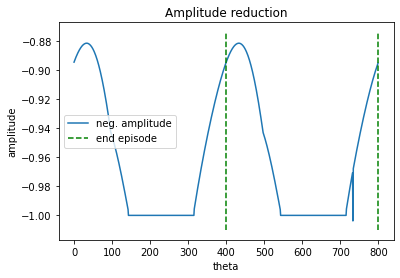

In [33]:
# np.array(obs_).reshape(10000, 1)

plt.title('Amplitude reduction')
# plt.plot(rews_beforer[:800], label='random acts', color='r')
plt.plot( rews_before[:800], label='neg. amplitude')
plt.plot([400]*1000,np.linspace(-1.01, -0.874, 1000), '--', color='g', label='end episode')
plt.plot([800]*1000,np.linspace(-1.01, -0.874, 1000), '--', color='g')

# plt.legend()
plt.legend()
plt.xlabel('theta')
plt.ylabel('amplitude')
plt.show()

In [34]:
obs_[:400]

[array([[0.]], dtype=float32),
 array([[0.01570796]], dtype=float32),
 array([[0.03141593]], dtype=float32),
 array([[0.04712389]], dtype=float32),
 array([[0.06283186]], dtype=float32),
 array([[0.07853982]], dtype=float32),
 array([[0.09424778]], dtype=float32),
 array([[0.10995574]], dtype=float32),
 array([[0.12566371]], dtype=float32),
 array([[0.14137167]], dtype=float32),
 array([[0.15707964]], dtype=float32),
 array([[0.17278759]], dtype=float32),
 array([[0.18849556]], dtype=float32),
 array([[0.20420352]], dtype=float32),
 array([[0.21991149]], dtype=float32),
 array([[0.23561946]], dtype=float32),
 array([[0.25132743]], dtype=float32),
 array([[0.26703537]], dtype=float32),
 array([[0.28274333]], dtype=float32),
 array([[0.2984513]], dtype=float32),
 array([[0.31415927]], dtype=float32),
 array([[0.3298672]], dtype=float32),
 array([[0.34557518]], dtype=float32),
 array([[0.36128315]], dtype=float32),
 array([[0.37699112]], dtype=float32),
 array([[0.3926991]], dtype=float32

In [ ]:
32, 81

In [21]:
obs_[324]

array([[5.0893803]], dtype=float32)

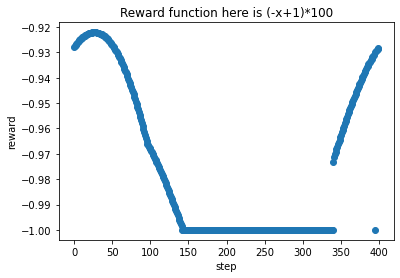

In [16]:
# np.array(obs_).reshape(10000, 1)

plt.title('Reward function here is (-x+1)*100')
plt.plot(rews_before[:400],'o', label='predicted acts')

# plt.plot(rews_beforer[:205], 'o',label='random acts')
# plt.legend()

plt.xlabel('step')
plt.ylabel('reward')
plt.show()

In [13]:
rews_before[140:220]

[-0.989731137752533,
 -0.9900340431928635,
 -0.9903796261548996,
 -0.9907360589504242,
 -0.9910262656211853,
 -0.9912823230028153,
 -0.9915007102489471,
 -0.9917414665222168,
 -0.9920252674818039,
 -0.9922232812643051,
 -0.9924709534645081,
 -0.9927397614717484,
 -0.9931159788370132,
 -0.9932406115531921,
 -0.9934337097406387,
 -0.9935885852575302,
 -0.9937626278400421,
 -0.9939335852861404,
 -0.9941280895471573,
 -0.9942992156744004,
 -0.9946485990285874,
 -0.9947235161066055,
 -0.9948075467348099,
 -0.9949750638008118,
 -0.995180558860302,
 -0.9952910089492798,
 -0.9955416372418404,
 -0.995557481944561,
 -0.9960679602622986,
 -0.9958441424369812,
 -0.9959653347730637,
 -0.9960863384604454,
 -0.9962020227313042,
 -0.9963323098421096,
 -0.9964519011974334,
 -0.9965559011697769,
 -0.996828043460846,
 -0.9967519104480743,
 -0.9970105466246605,
 -0.9969778993725776,
 -0.9970974567532539,
 -0.9971550747752189,
 -0.9972228235006333,
 -0.9973050251603126,
 -0.9974584057927132,
 -0.9975007009

In [14]:
obs_[140:171]

[array([[2.1991148]], dtype=float32),
 array([[2.2148228]], dtype=float32),
 array([[2.2305307]], dtype=float32),
 array([[2.2462387]], dtype=float32),
 array([[2.2619467]], dtype=float32),
 array([[2.2776546]], dtype=float32),
 array([[2.2933626]], dtype=float32),
 array([[2.3090706]], dtype=float32),
 array([[2.3247786]], dtype=float32),
 array([[2.3404865]], dtype=float32),
 array([[2.3561945]], dtype=float32),
 array([[2.3719025]], dtype=float32),
 array([[2.3876104]], dtype=float32),
 array([[2.4033184]], dtype=float32),
 array([[2.4190264]], dtype=float32),
 array([[2.4347343]], dtype=float32),
 array([[2.4504423]], dtype=float32),
 array([[2.4661503]], dtype=float32),
 array([[2.4818583]], dtype=float32),
 array([[2.4975662]], dtype=float32),
 array([[2.5132742]], dtype=float32),
 array([[2.5289822]], dtype=float32),
 array([[2.5446901]], dtype=float32),
 array([[2.560398]], dtype=float32),
 array([[2.576106]], dtype=float32),
 array([[2.591814]], dtype=float32),
 array([[2.6075

In [65]:
17*np.pi/10

5.340707511102648

In [33]:
acs_[:200]

[array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dt

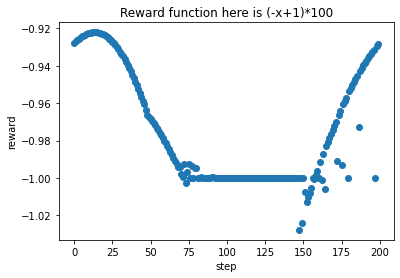

In [71]:
# np.array(obs_).reshape(10000, 1)

plt.title('Reward function here is (-x+1)*100')
plt.plot(rews_before[:200],'o', label='predicted acts')

# plt.plot(rews_beforer[:205], 'o',label='random acts')
# plt.legend()

plt.xlabel('step')
plt.ylabel('reward')
plt.show()

Random sample to check if exists such parameters of action that we will get better reward

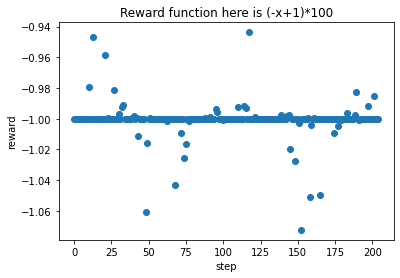

In [9]:
# np.array(obs_).reshape(10000, 1)

plt.title('Reward function here is (-x+1)*100')
plt.plot(rews_before[:205],'o', label='predicted acts')

# plt.plot(rews_beforer[:205], 'o',label='random acts')
# plt.legend()

plt.xlabel('step')
plt.ylabel('reward')
plt.show()

In [10]:
def vizualize(actions):
    list_of_acs = []
    for i in range(10):
        idx1= 100*i
        idx2 = 100*(i+1)
        list_of_acs.append(actions[idx1:idx2])
    t = np.linspace(0, 99, 100)
    mean = np.array(list_of_acs).mean(axis=0)
    std = np.array(list_of_acs).std(axis=0)
    fig = plt.figure(figsize=(14, 9))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(theta, mean, linewidth=2, label='mean')
    ax.plot(theta, np.array(list_of_acs)[9, :], 'o', linewidth=2, label='reward')
    ax.fill_between(theta, (mean - std), (mean+ std), color='orange', alpha=.25, label = 'std')
    plt.legend()

        

In [11]:
def denormalize_actions(action):
    high_a = np.array([180, 5380, 4])
    low_a = np.array([1, 0, 1])
    de_act = low_a + (high_a-low_a)*(action+1)/2 
    return de_act

In [12]:
denorm_acs = [denormalize_actions(i) for i in acs_]
first = [int(denorm_acs[i][0][0]) for i in range(len(acs_))]
second = [int(denorm_acs[i][0][1]) for i in range(len(acs_))]
third =[int(denorm_acs[i][0][2]) for i in range(len(acs_))]
width_n = list(np.array(first)*np.array(third))

In [13]:
 theta = [2*np.pi/400*i for i in range(100) ]

### visualize performance


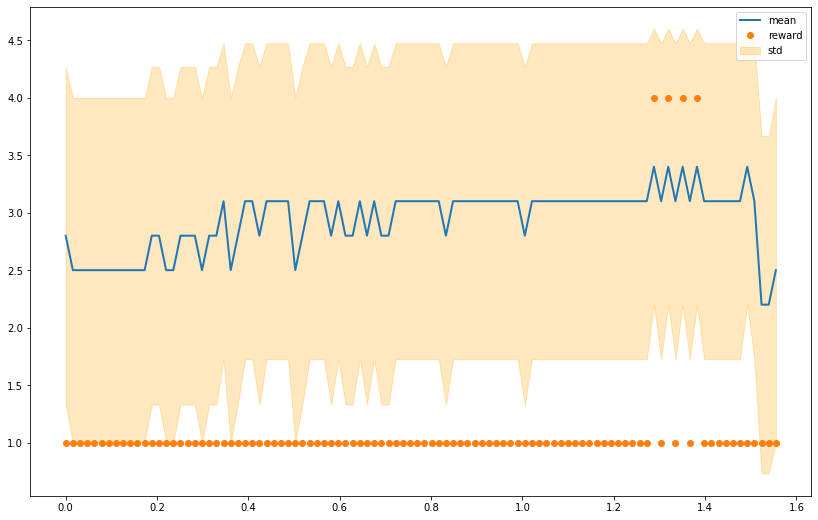

In [19]:
vizualize(third)

ValueError: x and y must have same first dimension, but have shapes (400,) and (100,)

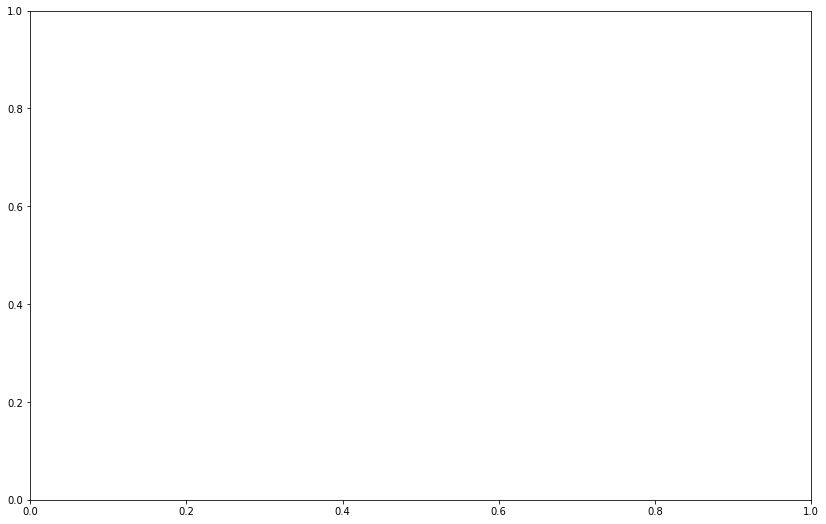

In [49]:
vizualize(width_n)


In [78]:
def get_impulse(moment, a1, a2, a3, obs_,  rews_before):
    impulse = []
    a1, a2, a3 = a1[moment], a2[moment], a3[moment]
    theta = np.array(obs_).reshape(len(obs_))[moment]
    reward = rews_before[moment]
    Amp = 0.9
    full = 6320
    impulse = [0] + [Amp] * a1 + [0] * a2 + [-Amp/a3] * a1 * a3 + [0] * (full-a1-a2-a1*a3)
    plt.title('Optimal form of impulse for time {} and theta {}'.format(moment, round(float(theta), 2)))
    plt.plot(impulse, label='reward {}'.format(round(reward, 2)))
    plt.legend()
    plt.xlabel('amplitude')
    plt.ylabel('step')
    plt.show()
    

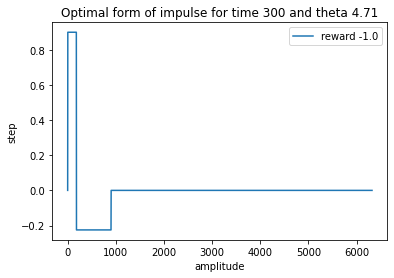

In [79]:
get_impulse(300, first, second, third, obs_,  rews_before)

In [60]:
np.array(obs_).reshape(len(obs_))

array([0.        , 0.01570796, 0.03141593, ..., 6.2360616 , 6.2517695 ,
       0.        ], dtype=float32)

In [61]:
rews_before

[-0.9277280712127686,
 -0.9273235464096069,
 -0.9269327402114869,
 -0.9265558052062988,
 -0.9261928939819336,
 -0.9258441591262817,
 -0.9255097436904907,
 -0.9251898145675659,
 -0.9248845100402832,
 -0.9245939874649047,
 -0.9243183946609497,
 -0.9240578889846802,
 -0.9238126134872436,
 -0.9235827255249023,
 -0.9233683681488037,
 -0.9231696891784668,
 -0.9229868412017822,
 -0.9228199625015259,
 -0.9226691961288452,
 -0.9225346946716309,
 -0.9224165868759155,
 -0.9223150157928467,
 -0.9222301197052002,
 -0.9221620321273803,
 -0.9221108818054199,
 -0.9220768022537231,
 -0.9220599174499512,
 -0.9220603466033935,
 -0.922078218460083,
 -0.9221136426925659,
 -0.9221667385101319,
 -0.9222376108169555,
 -0.9223263740539551,
 -0.9224331188201904,
 -0.922557954788208,
 -0.9227009677886963,
 -0.9228622531890869,
 -0.9230418920516967,
 -0.9232399702072144,
 -0.9234565591812134,
 -0.9236917352676391,
 -0.9239455556869507,
 -0.9242180871963501,
 -0.9245093870162964,
 -0.9248195028305054,
 -0.92514847

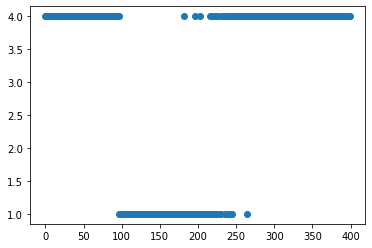

In [57]:
plt.plot(third[:400], 'o')

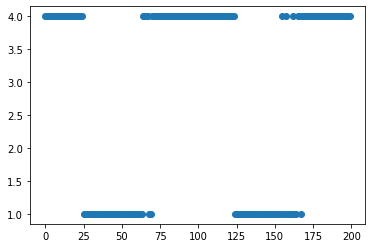

In [88]:
plt.plot(third[:200], 'o')

In [89]:
third[100]

4

In [90]:
second[100]

5380

In [91]:
first[100]

180

ValueError: x and y can be no greater than 2-D, but have shapes (100,) and (100, 1, 1)

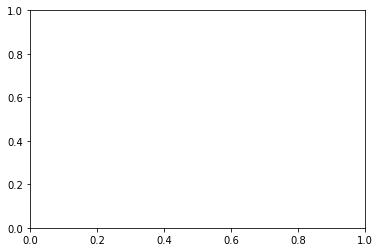

### Random performance

In [88]:
rews_r = []
#Store observations
obs_r = []
acs_r = []
obsr = env.reset()
cum_listr = []
rewr = 0
rews_beforer = []

for i in tqdm(range(10000)):
    action = model.env.action_space.sample()
    obs, rewards, dones, info = env.step(action)
    obs_r.append(obs)
    rews_beforer.append(rewards[0]/100-1)
    acs_r.append(action)
    rews_r.append(rewards)
    rewr += rewards
    
    if dones:
        obs = env.reset()
        cum_listr.append(rewr)
        rewr = 0
        
print(cum_listr)

100%|██████████| 10000/10000 [00:02<00:00, 4091.38it/s]

[array([-38.91536], dtype=float32), array([-8.923352], dtype=float32), array([-21.792526], dtype=float32), array([-12.375106], dtype=float32), array([-7.3159604], dtype=float32), array([8.580102], dtype=float32), array([-2.687204], dtype=float32), array([-33.41868], dtype=float32), array([-13.119445], dtype=float32), array([-13.389244], dtype=float32), array([-8.469376], dtype=float32), array([-10.285163], dtype=float32), array([-11.610494], dtype=float32), array([-25.356329], dtype=float32), array([-48.339706], dtype=float32), array([-21.161232], dtype=float32), array([-31.790659], dtype=float32), array([21.786026], dtype=float32), array([-36.679848], dtype=float32), array([18.457476], dtype=float32), array([10.8371], dtype=float32), array([4.239829], dtype=float32), array([-15.549778], dtype=float32), array([-9.86352], dtype=float32), array([-24.785933], dtype=float32)]


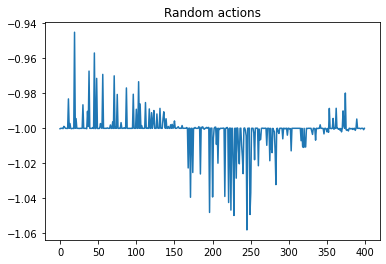

In [94]:
plt.title('Random actions')
plt.plot(rews_beforer[:400])

In [17]:
model.save('LSTM_best')

In [32]:
theta

[0.0,
 0.06283185307179587,
 0.12566370614359174,
 0.1884955592153876,
 0.25132741228718347,
 0.3141592653589793,
 0.3769911184307752,
 0.4398229715025711,
 0.5026548245743669,
 0.5654866776461628,
 0.6283185307179586,
 0.6911503837897546,
 0.7539822368615504,
 0.8168140899333463,
 0.8796459430051422,
 0.942477796076938,
 1.0053096491487339,
 1.0681415022205298,
 1.1309733552923256,
 1.1938052083641215,
 1.2566370614359172,
 1.3194689145077132,
 1.3823007675795091,
 1.4451326206513049,
 1.5079644737231008,
 1.5707963267948968,
 1.6336281798666925,
 1.6964600329384885,
 1.7592918860102844,
 1.8221237390820801,
 1.884955592153876,
 1.9477874452256718,
 2.0106192982974678,
 2.0734511513692637,
 2.1362830044410597,
 2.199114857512855,
 2.261946710584651,
 2.324778563656447,
 2.387610416728243,
 2.450442269800039,
 2.5132741228718345,
 2.5761059759436304,
 2.6389378290154264,
 2.7017696820872223,
 2.7646015351590183,
 2.8274333882308142,
 2.8902652413026098,
 2.9530970943744057,
 3.01592894

In [2]:
import pandas as pd

In [ ]:
df = pd.DataFrame(np.array(save_list).T, columns=['reward', 'width_p', 'gap', 'Kfactor', 'width_n'])

In [ ]:
df.to_csv('200_80_5_params', sep='\t')

In [ ]:
second

In [17]:
width_n = np.array(first)*np.array(third)

width_n

array([  1,   1,   1,   1,   2,   2, 240, 800, 800, 800, 800, 800, 800,
       800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800,
       800, 800, 800, 800, 600, 600, 600, 600, 600, 600, 600, 600, 600,
       400, 400, 400, 400, 400, 400, 400, 400, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 197, 187, 177, 187, 175, 173, 160, 156,
       141, 120, 132, 126, 111, 104,  89,  84,  73,   1,   1,   1,   1,
         2,   3, 279, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800,
       800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 600,
       600, 600, 600, 600, 600, 600, 600, 600, 400, 400, 400, 400, 400,
       400, 400, 400, 400, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 20

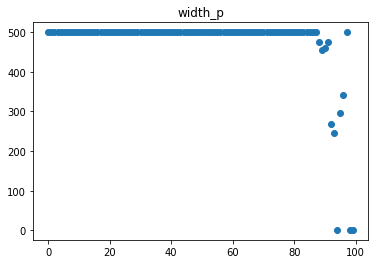

In [29]:
plt.title('width_p')
plt.plot(first[:100], 'o')


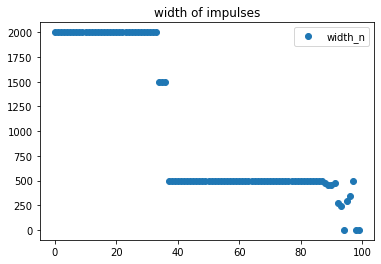

In [28]:
width_n = np.array(first)*np.array(third)
plt.title('width of impulses')
plt.plot(width_n[:100], 'o', label='width_n')
plt.legend()
plt.show()
# np.array(obs_).reshape(10000, 1)

In [ ]:
width_n[0]

In [ ]:
plt.plot(np.array(obs_).reshape(10000, 1)[:105], label='obs')

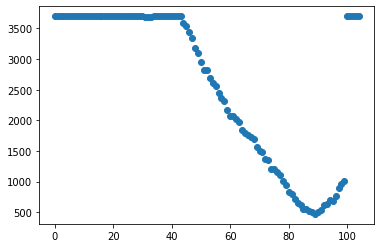

In [27]:
plt.plot(second[:105], 'o')


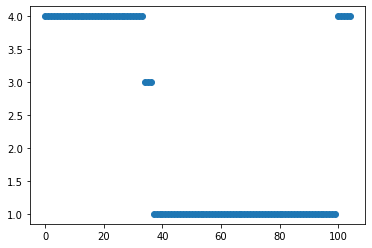

In [26]:
plt.plot(third[:105], 'o')

In [ ]:
third[:10]

In [ ]:
third[20]

In [ ]:
wid_1 = int(first[20]*100)
gap1 = 800
kfac = int(1+ 9*(third[20]+1)/2)
wid2=wid_1*kfac

In [ ]:
n = 1282 - (wid_1+gap1+wid2)

In [ ]:
amp1=0.9
amp2=-amp1/kfac

In [ ]:
plt.title('theta = {} with reward {}'.format(obs_[20][0].round(4), rews_before[20].round(3)))
plt.plot([amp1]*wid_1+[0]*gap1+[amp2]*wid2+[0]*n, label='action')
plt.legend()
plt.xlabel('step')
plt.ylabel('amplitude')
plt.show()

In [ ]:
rews_before[20].round(2)

In [ ]:
obs_[20]

In [ ]:
plt.title('gap')
plt.plot(second, 'o')
plt.plot(np.array(obs_).reshape(1000, 1))

In [ ]:
plt.title('Kfactor')
plt.plot(third)

In [ ]:
plt.plot(rews_)

In [ ]:
plt.plot(np.array(obs_).reshape(1000, 1))
plt.plot(rews_)

In [ ]:

model.env.action_space.sample()

## check random performance

In [17]:
rews_beforer

[-0.9999993908092438,
 -0.999999941770011,
 -0.9999999362476683,
 -0.9999996416063732,
 -0.9999994579024496,
 -0.999999521839818,
 -0.9999999964899956,
 -0.9999998153096021,
 -1.0000006963838677,
 -0.9999999847395463,
 -0.9999998733741268,
 -1.000000921613464,
 -0.9999999613782756,
 -0.9999999760665719,
 -0.9999999961144118,
 -0.999999997341323,
 -0.9999999993157891,
 -1.0000002063203284,
 -1.0000000149755044,
 -1.0000003323116835,
 -1.0000012830473133,
 -1.000002466738806,
 -1.0000001383250583,
 -1.0000009173722355,
 -1.000001566989522,
 -1.0000033695591264,
 -1.0000000024381586,
 -1.0000000759199157,
 -1.0000025029233075,
 -1.0000007655136143,
 -1.0000018198878389,
 -1.0000000029678853,
 -1.0000000017794686,
 -1.0000000287908666,
 -1.0000027416733792,
 -1.0000001321900618,
 -1.0000001442097255,
 -1.0000000012390295,
 -1.0000011138281844,
 -1.0000000267938163,
 -1.0000005211580356,
 -1.000000118681619,
 -1.000000000902925,
 -1.0000017747053063,
 -1.0000002014000529,
 -1.00000001008589

In [ ]:
plt.plot(rews_beforer)

In [ ]:
def make_env(env_id, rank, seed=0,):
    """
    Utility function for multiprocessed env.
    
    :param env_id: (str) the environment ID
    :param num_env: (int) the number of environment you wish to have in subprocesses
    :param seed: (int) the inital seed for RNG
    :param rank: (int) index of the subprocess
    :param s_i: (bool) reward form, only one can be true
    """
    def _init():
        env = gym.make(env_id)
        print(env.reset().shape)
        return env
    set_global_seeds(seed)
    return _init

In [ ]:
import gym
import numpy as np
from gym import error, spaces, utils
from gym.utils import seeding
import oscillator_cpp
from gym import Env
import yaml
from collections import deque
from gym.spaces import Discrete, MultiDiscrete, MultiBinary, Box
import matplotlib.pyplot as plt
from gym_oscillator.envs.osc_env import oscillatorEnv

In [ ]:
import gym
import gym_oscillator
from stable_baselines.common import set_global_seeds

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv,SubprocVecEnv,VecNormalize, VecEnv
from stable_baselines import PPO2
from stable_baselines.common.vec_env import VecEnv
from tqdm import tqdm
import random

import numpy as np
from matplotlib import pyplot as plt

def save_model(model, env, path_model="ppo_osc", path_env="osc.pkl"):
    model.save(path_model)
    env.save(path_env)

def load_model(env_id='oscillator-v1', path_model="ppo_osc", path_env="osc.pkl"):
    model = ACKTR.load(path_model)
    env = DummyVecEnv([lambda: gym.make(env_id)])
    env = VecNormalize.load(path_env, env)
    model.set_env(env)
    return model, env


def make_env(env_id, rank, seed=0,):
    """
    Utility function for multiprocessed env.
    
    :param env_id: (str) the environment ID
    :param num_env: (int) the number of environment you wish to have in subprocesses
    :param seed: (int) the inital seed for RNG
    :param rank: (int) index of the subprocess
    :param s_i: (bool) reward form, only one can be true
    """
    def _init():
        env = gym.make(env_id)
        print(env.reset().shape)
        return env
    set_global_seeds(seed)
    return _init

env_id = 'oscillator-v1'
env = DummyVecEnv([lambda: gym.make(env_id)])
env = VecNormalize(env)
from stable_baselines import DQN, PPO2, A2C, ACKTR
# env = gym.make(env_id)
model = ACKTR(MlpPolicy, env, verbose=1,tensorboard_log="MLP/")
model = ACKTR.load('./saved_models/ppo_osc_debug')
# env = DummyVecEnv([lambda: gym.make(env_id)])
# env = VecNormalize.load(path_env, env)
model.set_env(env)

model.learn(total_timesteps=200, log_interval= 100 )



In [ ]:
env.num_envs

In [ ]:
from tqdm import tqdm
rews_ = []
#Store observations
obs_ = []
acs_ = []
obs = env.reset()
cum_list = []
rew = 0


for i in tqdm(range(1000)):
    print('DDSD', obs)
    action, _states = model.predict(obs)
    print(action)
    obs, rewards, dones, info = env.step(action)
    print('ddd', rewards)
   # print(rewards, env.denormalize_actions(action))
    obs_.append(obs)
    acs_.append(action)
    rews_.append(rewards)
    rew += rewards
    
    
    if dones:
        obs = env.reset()
        cum_list.append(rew)
        rew = 0
        
print(cum_list) 


In [ ]:
obs = env.reset()

In [ ]:
obs

In [ ]:
env = gym.make(env_id)

In [ ]:
acs_

In [ ]:
model.load('saved_models/model5layers')

In [ ]:
env.visualize_actions(np.array(acs_))

In [ ]:
def save_model(model, env, path_model="ppo_osc", path_env="osc.pkl"):
    model.save(path_model)
    env.save(path_env)

def load_model(env_id='oscillator-v1', path_model="ppo_osc", path_env="osc.pkl"):
    model = ACKTR.load(path_model)
    env = DummyVecEnv([lambda: gym.make(env_id)])
    env = VecNormalize.load(path_env, env)
    model.set_env(env)
    return model, env

In [ ]:
env_id = 'oscillator-v1'
log_dir = '/save/'
# env = DummyVecEnv([lambda: gym.make(env_id)])
# env = VecNormalize(env, norm_obs=True, norm_reward=True,clip_obs=10.)
from stable_baselines import DQN, PPO2, A2C, ACKTR
env = DummyVecEnv([lambda: gym.make(env_id)])
env = VecNormalize(env)
# callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir=log_dir)

model = ACKTR(MlpPolicy, env, verbose=1,tensorboard_log="MLP/")

model.learn(total_timesteps=60, log_interval= 100)

save_model(model, env)

del model, env 

model, env = load_model()
model.learn(100)

In [ ]:
env

In [ ]:
env

In [ ]:
from stable_baselines.common.env_checker import check_env

check_env(env)

In [ ]:
from tqdm import tqdm
rews_ = []
#Store observations
obs_ = []
acs_ = []
obs = env.reset()
cum_list = []
rew = 0


for i in tqdm(range(6)):
    action, _states = model.predict(obs)
    
    obs, rewards, dones, info = env.step(action)
    print(rewards)
    print(action)
    obs_.append(obs)
    acs_.append(action)
    rews_.append(rewards)
    rew += rewards
    
    
    if dones:
        obs = env.reset()
        cum_list.append(rew)
        rew = 0
        
print(cum_list)   

In [ ]:
acs_[-10:]

In [ ]:
env.visualize_actions(acs_[-100:])

In [ ]:
env.visualize_state(np.array(obs_))

In [ ]:
env.visualize_actions(acs_[-100:])

In [ ]:
env.visualize_state(np.array(obs_))

In [ ]:
env.visualize_rewards(rews_[-500:])

In [ ]:
env.visualize_rewards(rews_)

env.visualize_state(np.array(obs_))

In [ ]:
plt.plot(cum_list)

In [ ]:
rews_

In [ ]:
obs = env.reset()
n_steps = 10
for _ in range(n_steps):
    # Random action
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    print(action, obs, reward)

In [ ]:
model

In [ ]:
model.learn(10)

In [ ]:
from stable_baselines.common.noise import AdaptiveParamNoiseSpec, NormalActionNoise
#Our env
env_id = 'oscillator-v1'
time_steps = int(10e6)
#Number of cpus
#num_cpu = 8
#env = make_env(env_id, 0)
#env = SubprocVecEnv([make_env(env_id, i) for i in range(num_cpu)])
env = gym.make(env_id)
model = PPO2(MlpPolicy, env, verbose=1,tensorboard_log="MLP/")
#model.learn(time_steps)

In [ ]:
from tqdm import tqdm
import random

In [ ]:
model.learn(total_timesteps=3000, log_interval= 100)

In [ ]:
model.save("one_step_4")

In [ ]:
del model

In [ ]:
model = PPO2.load("one_step_4")

In [ ]:
model

In [ ]:
model.learn(total_timesteps=3000, log_interval= 10000)

In [ ]:
env.action_space.sample()


from tqdm import tqdm
rews_ = []
#Store observations
obs_ = []
acs_ = []
obs = env.reset()
cum_list_2 = []
rew = 0
j=0

for i in tqdm(range(60000)):
    action = env.action_space.sample()
    obs, rewards, dones, info = env.step(action)
    obs_.append(obs)
    acs_.append(action)
    rews_.append(rewards)
    rew += rewards
    j+=1
    
    
    if dones:
        print('steps', j)
        print('###############')
        obs = env.reset()
        cum_list_2.append(rew)
        rew = 0
        
print(cum_list)    

In [ ]:
from tqdm import tqdm
rews_ = []
#Store observations
obs_ = []
acs_ = []
obs = env.reset()
cum_list = []
rew = 0


for i in tqdm(range(60000)):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    print(rewards)
    print(action)
    obs_.append(obs)
    acs_.append(action)
    rews_.append(rewards)
    rew += rewards
    
    
    if dones:
        obs = env.reset()
        cum_list.append(rew)
        rew = 0
        
print(cum_list)    

In [ ]:
plt.plot(cum_list)

In [ ]:
plt.plot(cum_list_2)

In [ ]:
plt.plot(cum_list)

In [ ]:
env.theta = 2*np.pi

In [ ]:
env.R = 1

In [ ]:
for i in range(102):
    obs, rewards, dones, info = env.step([600, 600, 10])
    print(obs, rewards)
    if dones:
        env.reset()

In [ ]:
obs, rewards, dones, info = env.step([366, 493, 2])
print(obs, rewards)

In [ ]:
env.memory

In [ ]:
# collect ('state', 'action', 'next_state', 'reward', 'done')
env.memory.clear()
for i in tqdm(range(3000)):
    #action, _states = model.predict(obs)
    action = [1700, 20, 10]
    s, r, dones, info = env.step(action)
    if r>-0.96: 
        print(action, r)
    env.memory.append((s,action,  r, dones))
    if dones:
        obs=env.reset()
        env.done=False

In [ ]:
env.memory

In [ ]:
obs =env.reset()
for i in tqdm(range(100)):
    #action, _states = model.predict(obs)
    action = [366, 493, 2]
    
    s, r, dones, info = env.step(action)
    print(s, r)


In [ ]:
rewards

In [ ]:
state_x = []
state_y = []
for i in tqdm(range(1000)):
    obs, rewards, dones, info = env.step([10, 10, 3])
    state_x.append(obs[0])
    state_y.append(obs[1])
    env.memory.append((obs, rewards, dones, info))
    if dones:
        env.reset()
        env.done = False


In [ ]:
plt.plot(state_x)

In [ ]:
plt.plot(state_y)

In [ ]:
#Store rewards
rews_ = []
#Store observations
obs_ = []
obs = env.reset()
#Store actions
acs_ = []
#Store X,Y according to 
states_x = []
states_y = []

#Initial, non-suppresssion 
for i in tqdm(range(5000)):
    obs, rewards, dones, info = env.step([10, 10, 3])
    states_x.append(env.x_val)
    states_y.append(env.y_val)
    obs_.append(obs[0])
    acs_.append(0)
    rews_.append(rewards)


In [ ]:
np.array([1,2], dtype=np.double)

In [ ]:
np.double(3)

In [ ]:

# def save_model(model, env, path_model="ppo_osc_new", path_env="osc_new.pkl"):
#     model.save(path_model)
#     env.save(path_env)

# def load_model(model, env, env_id='oscillator-v1', path_model="ppo_osc", path_env="osc.pkl"):
#     model = ACKTR.load(path_model)
#     env = DummyVecEnv([lambda: gym.make(env_id)])
#     env = VecNormalize.load(path_env, env)
#     model.set_env(env)
#     return model, env